# Automobiles Information 

#### Exploratory Data Analysis with Python

Dataset source: https://www.kaggle.com/code/pranayakuniyal/eda-on-car-information-dataset/input

File: Automobile.csv (18.8 kB)

Dataset provided by PRANAYAK UNIYAL

Retrieved: 14-August-2023

In [1]:
# Import required libraries/modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings as wn
wn.filterwarnings('ignore')

In [2]:
# Change working directory to Downloads

os.chdir(os.getcwd() + '\Downloads')

In [3]:
# Load the dataset into a dataframe

df = pd.read_csv('Automobile.csv')

df

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [4]:
# To check the information of the dataset we are working with.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# To check for rows with duplicate values.

df.duplicated().any()

False

In [6]:
# To check for the total number of missing values in each column of the dataframe.

df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
# To check for the total number of missing values in horsepower column of the dataframe.

df.horsepower.isnull().sum()

6

In [8]:
# Show records that have missing values somewhere

df[df.horsepower.isnull()==True]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


In [9]:
# Drop null values

data = df.dropna(subset=['horsepower'], axis=0)

# or, df.dropna(axis=0)
# or, df.drop(list(df[df.horsepower.isnull()==True].index), axis=0)

In [10]:
# Check summary stats

data.describe(include = 'all')

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,amc matador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245
mean,NaN,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,NaN
std,NaN,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,NaN
min,NaN,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN
25%,NaN,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,NaN
50%,NaN,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,NaN
75%,NaN,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,NaN


In [11]:
# Show the number of vehicles for each vehicle

data.name.value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: name, Length: 301, dtype: int64

In [12]:
# Let's check the number of vehicles originating fron USA

data[data['origin']=='usa']['origin'].count()

245

In [13]:
# The number of distinct vehicles in the dataset

len(data['name'].unique())

301

In [14]:
# To see the vehicles with 6 cylinders

data[data.cylinders==6]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
15,plymouth duster,22.0,6,198.0,95.0,2833,15.5,70,usa
16,amc hornet,18.0,6,199.0,97.0,2774,15.5,70,usa
17,ford maverick,21.0,6,200.0,85.0,2587,16.0,70,usa
24,amc gremlin,21.0,6,199.0,90.0,2648,15.0,70,usa
33,amc gremlin,19.0,6,232.0,100.0,2634,13.0,71,usa
...,...,...,...,...,...,...,...,...,...
365,ford granada gl,20.2,6,200.0,88.0,3060,17.1,81,usa
366,chrysler lebaron salon,17.6,6,225.0,85.0,3465,16.6,81,usa
386,buick century limited,25.0,6,181.0,110.0,2945,16.4,82,usa
387,oldsmobile cutlass ciera (diesel),38.0,6,262.0,85.0,3015,17.0,82,usa


In [15]:
# let's look for the country/origin that the produces the highest automobile

auto_origin = data.groupby('origin', as_index = False)[['name']].count().sort_values('name', ascending = False)

auto_origin

,origin,name
2,usa,245
1,japan,79
0,europe,68


In [16]:
# Automobiles with lowest values in each column

data.min()[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]

mpg              9.0
cylinders          3
displacement    68.0
horsepower      46.0
weight          1613
acceleration     8.0
model_year        70
dtype: object

In [17]:
# Automobiles with highest values in each column

data.max()[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]

mpg              46.6
cylinders           8
displacement    455.0
horsepower      230.0
weight           5140
acceleration     24.8
model_year         82
dtype: object

In [18]:
# The last two information can be combined into one

data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']] \
        .agg(['min','max']).transpose()

,min,max
mpg,9.0,46.6
cylinders,3.0,8.0
displacement,68.0,455.0
horsepower,46.0,230.0
weight,1613.0,5140.0
acceleration,8.0,24.8
model_year,70.0,82.0


In [46]:
# Unique values for cylinders

sorted(data['cylinders'].unique())

[3, 4, 5, 6, 8]

In [30]:
# Unique values for model_year

sorted(data['model_year'].unique(), reverse=True)

[82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70]

In [47]:
# Without referencing the name of the vehicle(s) that appear most frequently, we want to display the
# records of the vehicle(s) that appear most frequently..
# Let's see the modal value(s)

data.name.mode()

0       amc matador
1        ford pinto
2    toyota corolla
Name: name, dtype: object

In [48]:
# Present them as a list, since the mode is more than one value

list(data.name.mode())

['amc matador', 'ford pinto', 'toyota corolla']

In [19]:
# Ordinarily we would want to pass each item in the list as different filter conditions like this:
# data[(data.name == 'amc matador') | (data.name == 'ford pinto') | (data.name == 'toyota corolla')]

# However passing each item in the modal list for filtering is cumbersome when the items are much.
## So it is better to introduce the isin() function which is analogous to the IN clause in SQL.
### data[data.name.isin(['items in list'])]

data[data.name.isin(list(data.name.mode()))]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
37,amc matador,18.0,6,232.0,100.0,3288,15.5,71,usa
86,amc matador,14.0,8,304.0,150.0,3672,11.5,73,usa
112,ford pinto,19.0,4,122.0,85.0,2310,18.5,73,usa
130,ford pinto,26.0,4,122.0,80.0,2451,16.5,74,usa
134,amc matador,16.0,6,258.0,110.0,3632,18.0,74,usa
162,amc matador,15.0,6,258.0,110.0,3730,19.0,75,usa
167,toyota corolla,29.0,4,97.0,75.0,2171,16.0,75,japan
168,ford pinto,23.0,4,140.0,83.0,2639,17.0,75,usa
174,ford pinto,18.0,6,171.0,97.0,2984,14.5,75,usa
189,amc matador,15.5,8,304.0,120.0,3962,13.9,76,usa


In [50]:
# We can check the size of the returned data

data[data.name.isin(list(data.name.mode()))].shape

(15, 9)

In [53]:
# Hence we now want to display the records for vehicles that appear at least three times.
# First look at the vehicles that appear at least three times.
## To do this, we use the value_counts() method, not the count() method, on the 'name' column.
## Let's do the filtering:

data.name.value_counts()[data.name.value_counts() >= 3]

amc matador                  5
ford pinto                   5
toyota corolla               5
toyota corona                4
amc hornet                   4
chevrolet chevette           4
chevrolet impala             4
amc gremlin                  4
peugeot 504                  4
ford maverick                4
ford gran torino             3
honda civic                  3
chevrolet caprice classic    3
dodge colt                   3
volkswagen dasher            3
plymouth duster              3
chevrolet citation           3
chevrolet nova               3
pontiac catalina             3
plymouth fury iii            3
ford galaxie 500             3
chevrolet vega               3
Name: name, dtype: int64

In [57]:
# How to list out the vehicles in our value_counts filter

data.name.value_counts()[data.name.value_counts() >= 3].index

# compare, data.name.value_counts()[data.name.value_counts() >= 3].values

Index(['amc matador', 'ford pinto', 'toyota corolla', 'toyota corona',
       'amc hornet', 'chevrolet chevette', 'chevrolet impala', 'amc gremlin',
       'peugeot 504', 'ford maverick', 'ford gran torino', 'honda civic',
       'chevrolet caprice classic', 'dodge colt', 'volkswagen dasher',
       'plymouth duster', 'chevrolet citation', 'chevrolet nova',
       'pontiac catalina', 'plymouth fury iii', 'ford galaxie 500',
       'chevrolet vega'],
      dtype='object')

In [58]:
# How to see the number of vehicles in our value_counts filter

len(data.name.value_counts()[data.name.value_counts() >= 3].values)

# or, len(data.name.value_counts()[data.name.value_counts() >= 3].index)

22

In [20]:
# We now display the records for vehicles that appear at least three times.

data[data.name.isin(data.name.value_counts()[data.name.value_counts() >= 3].index)]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
15,plymouth duster,22.0,6,198.0,95.0,2833,15.5,70,usa
...,...,...,...,...,...,...,...,...,...
323,dodge colt,27.9,4,156.0,105.0,2800,14.4,80,usa
341,chevrolet citation,23.5,6,173.0,110.0,2725,12.6,81,usa
356,toyota corolla,32.4,4,108.0,75.0,2350,16.8,81,japan
382,toyota corolla,34.0,4,108.0,70.0,2245,16.9,82,japan


In [61]:
# Let's see the size of the result of our filtering

data[data.name.isin(data.name.value_counts()[data.name.value_counts() >= 3].index)].shape

(79, 9)

In [21]:
## Alternatively, instead of using isin() with value_counts() filtering
## we can use lambda function with filter() and groupby()

data.groupby('name').filter(lambda x: len(x) >= 3)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,usa
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
15,plymouth duster,22.0,6,198.0,95.0,2833,15.5,70,usa
...,...,...,...,...,...,...,...,...,...
323,dodge colt,27.9,4,156.0,105.0,2800,14.4,80,usa
341,chevrolet citation,23.5,6,173.0,110.0,2725,12.6,81,usa
356,toyota corolla,32.4,4,108.0,75.0,2350,16.8,81,japan
382,toyota corolla,34.0,4,108.0,70.0,2245,16.9,82,japan


In [48]:
# Let's see the size of the result of our filtering again

data.groupby('name').filter(lambda x: len(x) >= 3).shape

(79, 9)

In [63]:
# However the first option runs faster

%timeit data[data.name.isin(data.name.value_counts()[data.name.value_counts() >= 3].index)]

3.32 ms ± 331 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
# Compared with the second option

%timeit data.groupby('name').filter(lambda x: len(x) >= 3)

17.5 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
# The top 10 Automobiles for high mpg in descending order of horsepower

data.sort_values(['mpg', 'horsepower'], ascending=[False, False]).head(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan
329,honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,80,japan
325,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
326,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe
244,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,78,europe
309,vw rabbit,41.5,4,98.0,76.0,2144,14.7,80,europe
324,datsun 210,40.8,4,85.0,65.0,2110,19.2,80,japan
247,datsun b210 gx,39.4,4,85.0,70.0,2070,18.6,78,japan
343,toyota starlet,39.1,4,79.0,58.0,1755,16.9,81,japan


In [52]:
# Top 10 Automobiles for high mpg in descending order of acceleration

data.sort_values(['mpg', 'acceleration'], ascending=[False, False]).head(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan
329,honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,80,japan
325,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
326,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe
244,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,78,europe
309,vw rabbit,41.5,4,98.0,76.0,2144,14.7,80,europe
324,datsun 210,40.8,4,85.0,65.0,2110,19.2,80,japan
247,datsun b210 gx,39.4,4,85.0,70.0,2070,18.6,78,japan
343,toyota starlet,39.1,4,79.0,58.0,1755,16.9,81,japan


In [53]:
# Top 10 Automobiles for high mpg in descending order of model_year

data.sort_values(['mpg', 'model_year'], ascending=[False, False]).head(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan
329,honda civic 1500 gl,44.6,4,91.0,67.0,1850,13.8,80,japan
325,vw rabbit c (diesel),44.3,4,90.0,48.0,2085,21.7,80,europe
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
326,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe
244,volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,78,europe
309,vw rabbit,41.5,4,98.0,76.0,2144,14.7,80,europe
324,datsun 210,40.8,4,85.0,65.0,2110,19.2,80,japan
247,datsun b210 gx,39.4,4,85.0,70.0,2070,18.6,78,japan
343,toyota starlet,39.1,4,79.0,58.0,1755,16.9,81,japan


In [65]:
# The number of Automobiles per cylinder size

data.groupby('cylinders', as_index=False)[['name']].count().sort_values('name', ascending = False) \
        .rename(columns={'name' : 'number of vehicles'})

,cylinders,number of vehicles
1,4,199
4,8,103
3,6,83
0,3,4
2,5,3


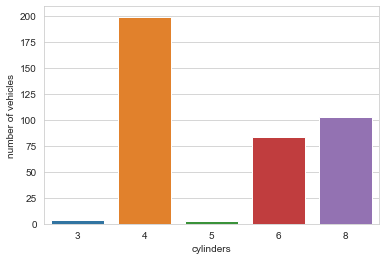

In [66]:
# Visualizing the number of Automobiles per cylinder size using Seaborn

name_cylinder = data.groupby('cylinders', as_index=False)[['name']].count() \
        .sort_values('name').rename(columns={'name' : 'number of vehicles'})

sns.set_style("whitegrid")

sns.barplot(data=name_cylinder, x=name_cylinder['cylinders'], y=name_cylinder['number of vehicles'])

plt.show()

In [67]:
# Number of Automobiles per model_year

data.groupby('model_year', as_index=False)[['name']].count() \
    .sort_values('model_year').rename(columns={'name' : 'number of vehicles'})

,model_year,number of vehicles
0,70,29
1,71,27
2,72,28
3,73,40
4,74,26
5,75,30
6,76,34
7,77,28
8,78,36
9,79,29


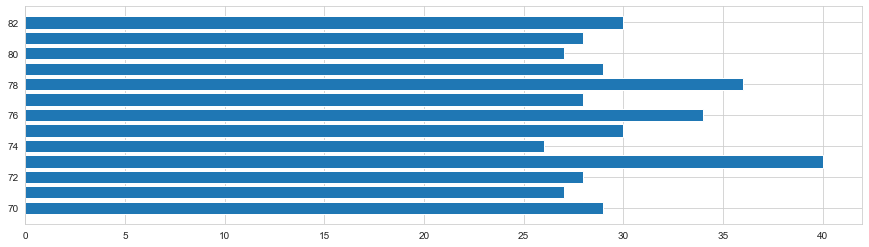

In [68]:
# visualizing number of Automobiles per model_year as bar chart

name_model = data.groupby('model_year', as_index=False)[['name']].count() \
    .sort_values('model_year').rename(columns={'name' : 'number of vehicles'})

plt.figure(figsize=(15,4))

plt.barh(y= name_model['model_year'], width = name_model['number of vehicles'])

plt.show()

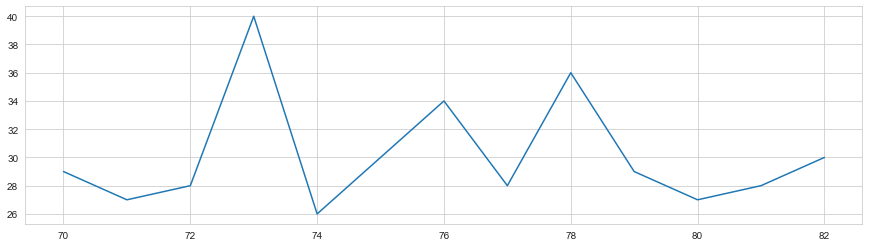

In [69]:
# Visualizing number of Automobiles per model_year as line chart

name_model = data.groupby('model_year', as_index=False)[['name']].count() \
    .sort_values('model_year').rename(columns={'name' : 'number of vehicles'})

plt.figure(figsize=(15,4))

plt.plot(name_model['model_year'], name_model['number of vehicles'])

plt.show()

In [70]:
# Number of Automobiles per origin

data.groupby('origin', as_index=False)[['name']].count().sort_values('name',ascending = False) \
        .rename(columns={'name' : 'number of vehicles'})

,origin,number of vehicles
2,usa,245
1,japan,79
0,europe,68


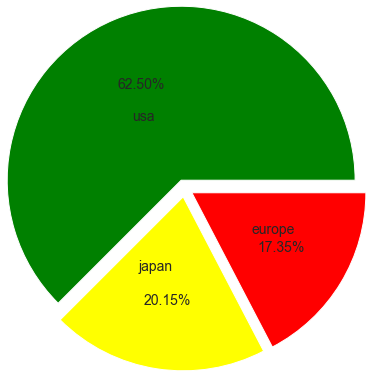

In [71]:
# Visualizing the umber of Automobiles per origin using MatPlotLib

name_origin = data.groupby('origin', as_index=False)[['name']].count() \
    .sort_values('name',ascending = False).rename(columns={'name' : 'number of vehicles'})

plt.pie(x = name_origin['number of vehicles'], labels = name_origin['origin'],radius = 2, \
        labeldistance=.4,autopct = '%.2f%%', colors=['green','yellow','red'], \
        textprops={'fontsize': 14}, explode=[0.1,0.1,0.1])

plt.show()

In [74]:
# Highest and lowest mpg for each cylinder size

low_high_mpg_cylinder = data.groupby('cylinders', as_index=False)['mpg'].agg(['min','max'])

low_high_mpg_cylinder

,min,max
cylinders,,
3,18.0,23.7
4,18.0,46.6
5,20.3,36.4
6,15.0,38.0
8,9.0,26.6


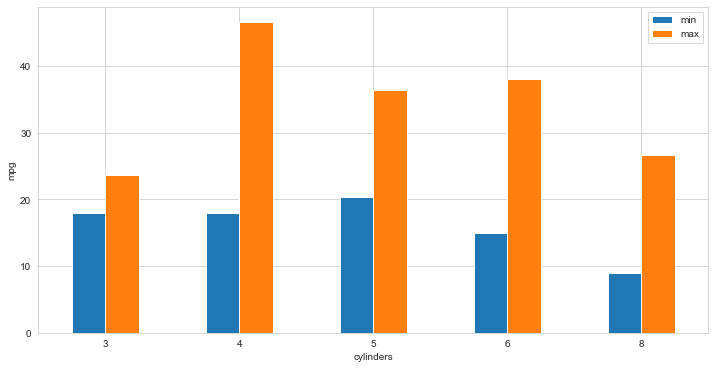

In [75]:
# Visualizing the highest and lowest mpg for each cylinder size

low_high_mpg_cylinder.plot.bar(rot=0, figsize=(12, 6), ylabel='mpg')

plt.show()

In [76]:
# Highest and lowest horsepower per country origin 

low_high_hp_origin = data.groupby('origin', as_index=False)['horsepower'].agg(['min','max'])

low_high_hp_origin

,min,max
origin,,
europe,46.0,133.0
japan,52.0,132.0
usa,52.0,230.0


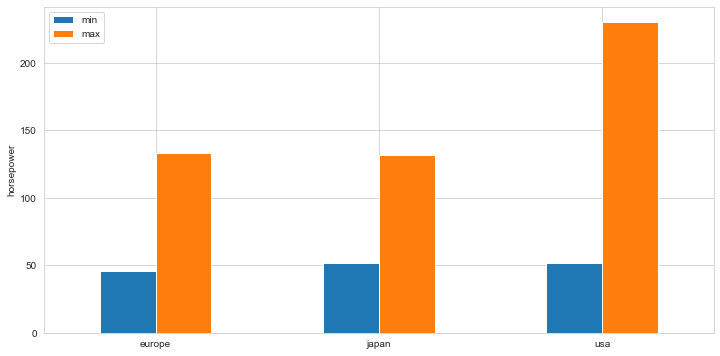

In [65]:
# Visualizing the highest and lowest horsepower per country origin 

low_high_hp_origin.plot(kind = 'bar',rot=0, figsize=(12, 6), ylabel='horsepower', xlabel='')

plt.show()

In [22]:
# Let's look at the 8 cylinder vehicles

cy_8 = data[data.cylinders==8]

cy_8

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
291,chevrolet malibu classic (sw),19.2,8,267.0,125.0,3605,15.0,79,usa
292,chrysler lebaron town @ country (sw),18.5,8,360.0,150.0,3940,13.0,79,usa
298,cadillac eldorado,23.0,8,350.0,125.0,3900,17.4,79,usa
300,oldsmobile cutlass salon brougham,23.9,8,260.0,90.0,3420,22.2,79,usa


In [78]:
# Average hoesepower of vehicles per model_year 

cy_8.groupby('model_year', as_index=False)['horsepower'].mean()

,model_year,horsepower
0,70,183.666667
1,71,166.857143
2,72,159.692308
3,73,170.000000
4,74,146.000000
5,75,142.000000
6,76,146.333333
7,77,152.375000
8,78,135.500000
9,79,131.900000


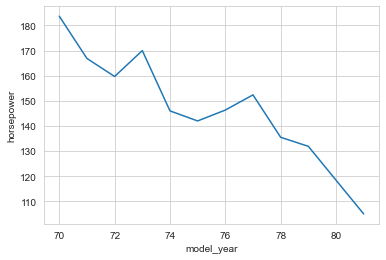

In [79]:
# Visualizing the average hoesepower of vehicles per model_year 

cylinder_eight = cy_8.groupby('model_year', as_index=False)['horsepower'].mean()

sns.lineplot(x = cylinder_eight['model_year'], y = cylinder_eight['horsepower'])

plt.show()

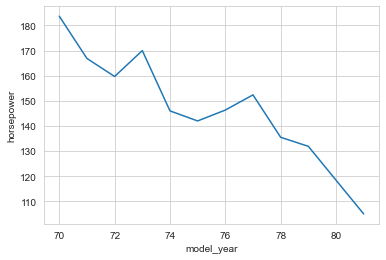

In [69]:
# Another way to write the visualizing code

cylinder_eight.plot.line(x = 'model_year', y = 'horsepower', legend=False, ylabel='horsepower')

plt.show()

In [80]:
# Average displacement of vehicles per model_year 

cy_8.groupby('model_year', as_index=False)['displacement'].mean()

,model_year,displacement
0,70,367.555556
1,71,371.714286
2,72,344.846154
3,73,365.250000
4,74,315.200000
5,75,330.500000
6,76,324.000000
7,77,335.750000
8,78,300.833333
9,79,321.400000


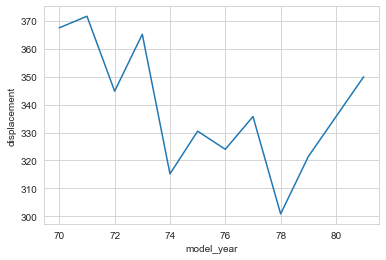

In [81]:
# Visualizing the average displacement of vehicles per model_year 

displacement_eight = cy_8.groupby('model_year', as_index=False)['displacement'].mean()

sns.lineplot(x = displacement_eight['model_year'], y = displacement_eight['displacement'])

plt.show()

In [82]:
# Average weight of vehicles per model_year 

cy_8.groupby('model_year', as_index=False)['weight'].mean()

,model_year,weight
0,70,3940.055556
1,71,4537.714286
2,72,4228.384615
3,73,4279.050000
4,74,4438.400000
5,75,4108.833333
6,76,4064.666667
7,77,4177.500000
8,78,3563.333333
9,79,3862.900000


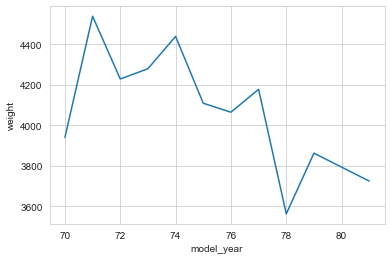

In [83]:
# Visualizing the average weight of vehicles per model_year 

weight_eight = cy_8.groupby('model_year', as_index=False)['weight'].mean()

sns.lineplot(x = weight_eight['model_year'], y = weight_eight['weight'])

plt.show()

In [84]:
# Average acceleration of vehicles per model_year 

cy_8.groupby('model_year', as_index=False)['acceleration'].mean()

,model_year,acceleration
0,70,11.194444
1,71,12.214286
2,72,13.000000
3,73,12.250000
4,74,14.700000
5,75,13.166667
6,76,13.222222
7,77,13.662500
8,78,13.266667
9,79,15.400000


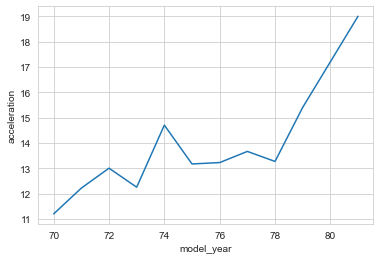

In [85]:
# Visualizing the average acceleration of vehicles per model_year 

acceleration_eight = cy_8.groupby('model_year', as_index=False)['acceleration'].mean()

sns.lineplot(x = acceleration_eight['model_year'], y =acceleration_eight['acceleration'])

plt.show()

In [23]:
# Let's look at 4 cylinder vehicles 

cy_4 = data[data.cylinders==4]

cy_4

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,toyota corona mark ii,24.0,4,113.0,95.0,2372,15.0,70,japan
18,datsun pl510,27.0,4,97.0,88.0,2130,14.5,70,japan
19,volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,europe
20,peugeot 504,25.0,4,110.0,87.0,2672,17.5,70,europe
21,audi 100 ls,24.0,4,107.0,90.0,2430,14.5,70,europe
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa


In [87]:
# Average horsepower of vehicles per model_year 

cy_4.groupby('model_year', as_index=False)['horsepower'].mean()

,model_year,horsepower
0,70,87.714286
1,71,77.583333
2,72,85.142857
3,73,82.909091
4,74,74.000000
5,75,84.916667
6,76,75.600000
7,77,78.785714
8,78,79.705882
9,79,75.750000


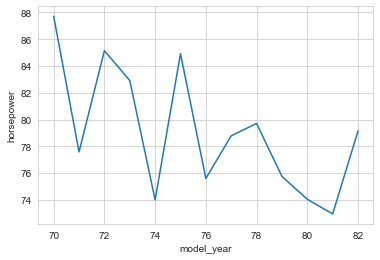

In [88]:
# Visualizing the average horsepower of vehicles per model_year 

cylinder_four = cy_4.groupby('model_year', as_index=False)['horsepower'].mean()

sns.lineplot(x = cylinder_four['model_year'], y = cylinder_four['horsepower'])

plt.show()

In [79]:
# Average displacement of vehicles per model_year 

cy_4.groupby('model_year', as_index=False)['displacement'].mean()

,model_year,displacement
0,70,107.000000
1,71,102.166667
2,72,111.535714
3,73,109.272727
4,74,96.533333
5,75,114.833333
6,76,106.333333
7,77,106.500000
8,78,112.117647
9,79,113.583333


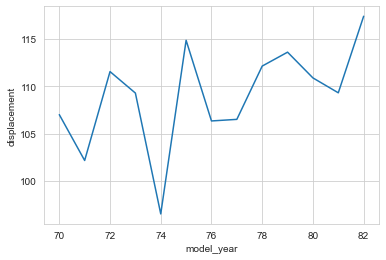

In [89]:
# Visualizing the average displacement of vehicles per model_year 

cylinder_four = cy_4.groupby('model_year', as_index=False)['displacement'].mean()

sns.lineplot(x = cylinder_four['model_year'], y = cylinder_four['displacement'])

plt.show()

In [81]:
# Average weight of vehicles per model_year 

cy_4.groupby('model_year', as_index=False)['weight'].mean()

,model_year,weight
0,70,2292.571429
1,71,2057.250000
2,72,2382.642857
3,73,2338.090909
4,74,2151.466667
5,75,2489.250000
6,76,2306.600000
7,77,2205.071429
8,78,2296.764706
9,79,2357.583333


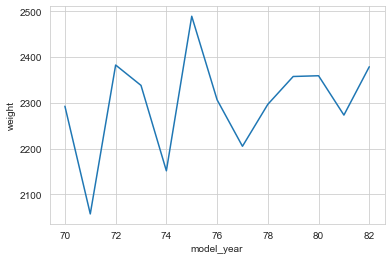

In [90]:
# Visualizing the average weight of vehicles per model_year 

cylinder_four = cy_4.groupby('model_year', as_index=False)['weight'].mean()

sns.lineplot(x = cylinder_four['model_year'], y = cylinder_four['weight'])

plt.show()

In [83]:
# Average acceleration of vehicles per model_year 

cy_4.groupby('model_year', as_index=False)['acceleration'].mean()

,model_year,acceleration
0,70,16.000000
1,71,16.791667
2,72,17.214286
3,73,17.136364
4,74,16.400000
5,75,15.833333
6,76,16.866667
7,77,16.064286
8,78,16.282353
9,79,15.991667


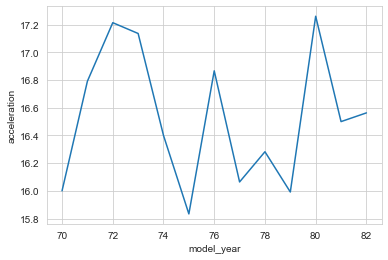

In [84]:
# Visualizing the average acceleration of vehicles per model_year 

cylinder_four = cy_4.groupby('model_year', as_index=False)['acceleration'].mean()

sns.lineplot(x = cylinder_four['model_year'], y = cylinder_four['acceleration'])

plt.show()

In [24]:
# Let's look at the 6 cylinder vehicles

cy_6 = data[data.cylinders==6]

cy_6

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
15,plymouth duster,22.0,6,198.0,95.0,2833,15.5,70,usa
16,amc hornet,18.0,6,199.0,97.0,2774,15.5,70,usa
17,ford maverick,21.0,6,200.0,85.0,2587,16.0,70,usa
24,amc gremlin,21.0,6,199.0,90.0,2648,15.0,70,usa
33,amc gremlin,19.0,6,232.0,100.0,2634,13.0,71,usa
...,...,...,...,...,...,...,...,...,...
365,ford granada gl,20.2,6,200.0,88.0,3060,17.1,81,usa
366,chrysler lebaron salon,17.6,6,225.0,85.0,3465,16.6,81,usa
386,buick century limited,25.0,6,181.0,110.0,2945,16.4,82,usa
387,oldsmobile cutlass ciera (diesel),38.0,6,262.0,85.0,3015,17.0,82,usa


In [92]:
# Average horsepower of vehicles per model_year 

cy_6.groupby('model_year', as_index=False)['horsepower'].mean()

,model_year,horsepower
0,70,91.750000
1,71,98.875000
2,73,102.125000
3,74,101.666667
4,75,96.750000
5,76,98.700000
6,77,102.000000
7,78,109.833333
8,79,105.000000
9,80,111.000000


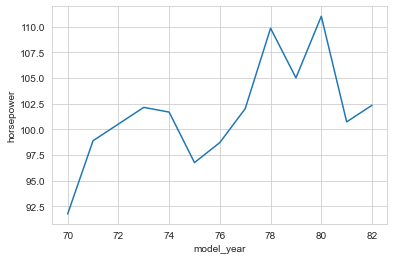

In [93]:
# Visualizing the average horsepower of vehicles per model_year 

cylinder_six = cy_6.groupby('model_year', as_index=False)['horsepower'].mean()

sns.lineplot(x = cylinder_six['model_year'], y = cylinder_six['horsepower'])

plt.show()

In [95]:
# Average displacement of vehicles per model_year 

cy_6.groupby('model_year', as_index=False)['displacement'].mean()

,model_year,displacement
0,70,199.000000
1,71,243.375000
2,73,212.250000
3,74,235.500000
4,75,233.750000
5,76,221.400000
6,77,220.400000
7,78,213.250000
8,79,205.666667
9,80,196.500000


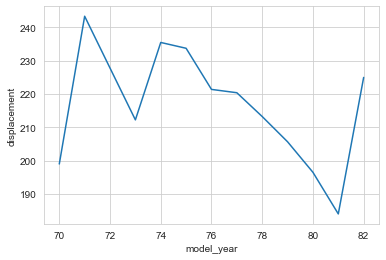

In [96]:
# Visualizing the average displacement of vehicles per model_year 

cylinder_six = cy_6.groupby('model_year', as_index=False)['displacement'].mean()

sns.lineplot(x = cylinder_six['model_year'], y = cylinder_six['displacement'])

plt.show()

In [90]:
# Average weight of vehicles per model_year 

cy_6.groupby('model_year', as_index=False)['weight'].mean()

,model_year,weight
0,70,2710.500000
1,71,3171.875000
2,73,2917.125000
3,74,3394.166667
4,75,3398.333333
5,76,3349.600000
6,77,3383.000000
7,78,3314.166667
8,79,3025.833333
9,80,3145.500000


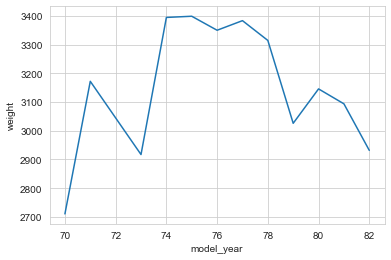

In [97]:
# Visualizing the average weight of vehicles per model_year 

cylinder_six = cy_6.groupby('model_year', as_index=False)['weight'].mean()

sns.lineplot(x = cylinder_six['model_year'], y = cylinder_six['weight'])

plt.show()

In [99]:
# Average acceleration of vehicles per model_year 

cy_6.groupby('model_year', as_index=False)['acceleration'].mean()

,model_year,acceleration
0,70,15.500000
1,71,14.750000
2,73,15.687500
3,74,16.833333
4,75,17.708333
5,76,17.000000
6,77,16.900000
7,78,16.391667
8,79,15.433333
9,80,15.050000


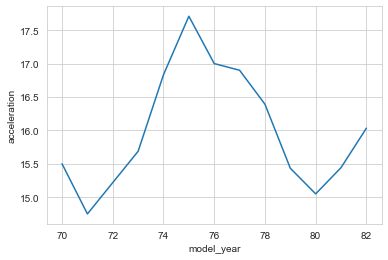

In [100]:
# Visualizing the average acceleration of vehicles per model_year 

cylinder_six = cy_6.groupby('model_year', as_index=False)['acceleration'].mean()

sns.lineplot(x = cylinder_six['model_year'], y = cylinder_six['acceleration'])

plt.show()

In [101]:
# Finally let's see the number of automobiles per number of cylinders per country of origin

dataset = data.groupby(['origin', 'cylinders'], as_index=False)[['name']].count() \
        .sort_values('cylinders').rename(columns={'name':'number of vehicles'})

dataset

,origin,cylinders,number of vehicles
3,japan,3,4
0,europe,4,61
4,japan,4,69
6,usa,4,69
1,europe,5,3
2,europe,6,4
5,japan,6,6
7,usa,6,73
8,usa,8,103


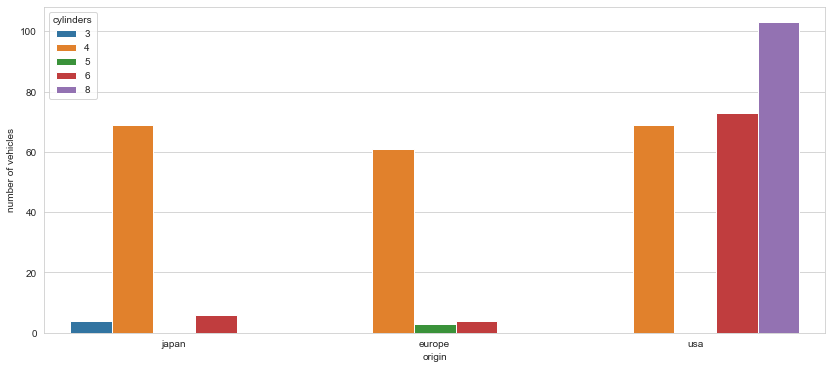

In [102]:
# Visualizing the number of automobiles per number of cylinders per country of origin

plt.figure(figsize=(14, 6))

sns.barplot(data=dataset, x='origin', y='number of vehicles', hue='cylinders')

plt.show()

In [73]:
### END NOTE:
### Ordinarily, Seaborn does not have barh. But you can get a barh if you interchange the labels data 
### with the values data. However this wont work if both labels data and values data are both numbers.
### In this case, Seaborn will plot an meaningless vertical bar instead of the intended barh.

##### Thanks for going through this with me!